In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist

In [2]:
X_train, train_labels = loadlocal_mnist(
    images_path='MNIST/train-images.idx3-ubyte',
    labels_path='MNIST/train-labels.idx1-ubyte')
X_test, test_labels = loadlocal_mnist(
    images_path='MNIST/t10k-images.idx3-ubyte',
    labels_path='MNIST/t10k-labels.idx1-ubyte')

In [3]:
y_enc = []
for num in train_labels:
    row = np.zeros(10)
    row[num] = 1
    y_enc.append(row)
y_enc = np.array(y_enc)

X_train = X_train/np.max(X_train)
ones = np.ones((X_train.shape[0],1))
X_train = np.hstack(( X_train,ones))

w = np.random.uniform(0,1,(785, 10))

learning_rate = 1e-5
lamda = 5
loss_matrix = []
stopping_criteria = 10
J_cost = 0
ite = 0

In [4]:
def input_matrix(X, W):
    out = X@W
    return (out)

def softmax(x,w):
    z = x@w
    z  -= np.max(z, axis=1).reshape((-1,1))

    sm = np.exp(z)/np.exp(z).sum(axis=1).reshape((-1, 1))
    return sm

def cost_func(N,smax, y_enc,lam, X_train,W):
    cost = (-1/N)* np.sum(y_enc * np.log(smax)) + (lam/2) * np.sum(W * W)
    diff = (smax - y_enc)
    grad = (X_train.T@diff) +(lam/2) * W
    return cost,grad

def getProbPred(X_data):
    probability = softmax(X_data,w)
    prediction = np.argmax(probability,axis=1)
    return probability,prediction

In [5]:
while ite!=100:
    ite +=1
    smax = softmax(X_train, w)
    prev_J = J_cost
    J_cost , grad = cost_func(60000, smax, y_enc, lamda,X_train,w) 
    w = w - learning_rate * grad 
    stopping_criteria = abs(prev_J - J_cost)
    loss_matrix.append(J_cost)
    print(J_cost)

6547.185079107527
6541.158856671641
6536.772037742428
6534.127586921396
6532.20488389075
6530.722712643084
6529.567116194778
6528.607695467452
6527.816619185343
6527.126440105172
6526.535882399576
6526.0053253791075
6525.536674432921
6525.108598875102
6524.719908877756
6524.360226764258
6524.026712210767
6523.714165260145
6523.419802629313
6523.140638485185
6522.874499069697
6522.619433618608
6522.373850101467
6522.1363793391865
6521.905862121247
6521.681304186789
6521.461852240254
6521.246770499437
6521.035422792742
6520.827257477484
6520.62179504575
6520.418617780662
6520.2173610954405
6520.017706242428
6519.819374145723
6519.622120162348
6519.425729613983
6519.230013961944
6519.03480752151
6518.839964630629
6518.645357202947
6518.450872607213
6518.256411824865
6518.0618878455025
6517.867224266407
6517.672354067671
6517.477218538773
6517.281766336157
6517.085952654386
6516.889738495993
6516.693090027217
6516.495978008742
6516.298377291928
6516.100266372436
6515.901626994169
6515.7024

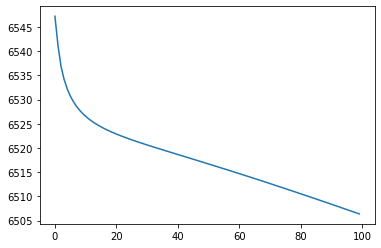

In [6]:
plt.plot(loss_matrix)

In [7]:
def getAccuracy(features,target):
    prob,prede = getProbPred(features)
    sum = 0
    for ite in range(len(target)):
        if prede[ite] ==target[ite]:
            sum+=1
    return sum/len(target)


In [8]:
train_accuracy = getAccuracy(X_train, train_labels)
print(train_accuracy)


0.8651333333333333


In [9]:

X_test = X_test/np.max(X_test)
X_test = X_test/np.max(X_train)

ones = np.ones((X_test.shape[0],1))
X_test = np.hstack(( X_test,ones))
test_accuracy = getAccuracy(X_test, test_labels)
print(test_accuracy)

0.8718


Text(0, 0.5, 'Cost: 6506.390760')

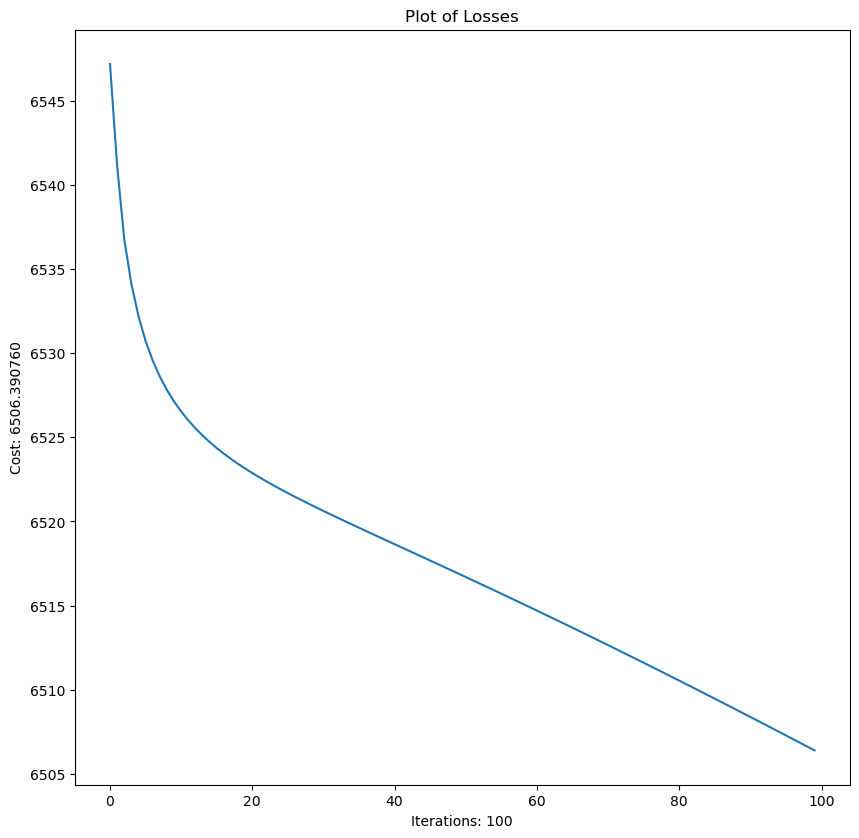

In [10]:
plt.figure(figsize=(10,10), dpi=100)
plt.plot(loss_matrix)
plt.title('Plot of Losses')
plt.xlabel(f'Iterations: {ite}')
plt.ylabel(f'Cost: {J_cost:4f}')

In [11]:
from sklearn import metrics
import seaborn as sns


In [14]:
prob = softmax(X_train,w)
pred = np.argmax(prob, axis=1)
cm = metrics.confusion_matrix(train_labels, pred)

Text(0.5, 1.0, 'Confusion Matrx for Softmax Linear Regression For MNIST with Linear Model')

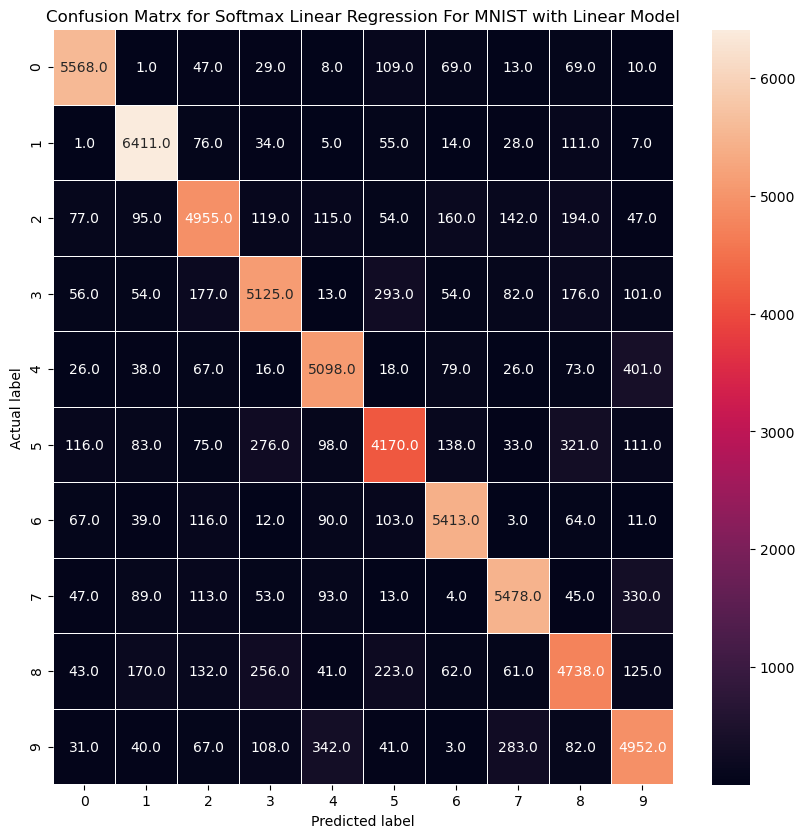

In [15]:
plt.figure(figsize=(10,10), dpi = 100)
sns.heatmap(cm, annot=True,fmt=".1f", linewidths=0.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrx for Softmax Linear Regression For MNIST with Linear Model')